In [1]:
import pandas as pd

In [2]:
import numpy as np

# Import the dataset 

In [3]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [4]:
df.head(1)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...


# Check for unique value of output

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [6]:
df['Category'].unique()


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

# Check for null

In [107]:
df.dropna(inplace=True)


In [108]:
df.shape

(962, 3)

In [7]:
import nltk

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocesss the text :
 remove stop words 
 
 tokenizing the text 
 
 lemmatize the word 

In [10]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    return " ".join(
        lemmatizer.lemmatize(word)
        for word in tokens
        if word.isalnum() and word not in stop_words
    )

In [11]:
df['Preprocess_Resume'] = df['Resume'].apply(preprocess_text)
df.head()

,Category,Resume,Preprocess_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 data scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


# Convert the Output text into numbers or label using LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder 

In [13]:
label = LabelEncoder()



In [14]:
label.fit(df['Category'])


LabelEncoder()

In [15]:
df['Category'] = label.transform(df['Category'])

In [16]:
df['Category'].value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [17]:
import tensorflow

In [18]:
from tensorflow import  keras

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer 

# Tokenization and Sequence Padding

In [20]:
max_vocab_size = 5000    #Maximum vocabulary size to consider
max_length = 100       # Maximum length of sequences

In [21]:
tokenizer = Tokenizer(num_words=max_vocab_size)

In [22]:
tokenizer

In [23]:
tokenizer.fit_on_texts(df['Preprocess_Resume'])


In [24]:
word_index = tokenizer.word_index

In [25]:
max_vocab_size = len(word_index)

In [26]:
max_vocab_size

6436

In [ ]:
# Convert text data to sequences of integers

In [27]:
sequences = tokenizer.texts_to_sequences(df['Preprocess_Resume'])

In [28]:
# sequences

In [29]:
df['Preprocess_Resume']

0      skill programming language python panda numpy ...
1      education detail may 2013 may 2017 data scient...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      education detail mca ymcaust faridabad haryana...
                             ...                        
957    computer skill proficient m office word basic ...
958    willingness accept challenge positive thinking...
959    personal skill quick learner eagerness learn n...
960    computer skill software knowledge point m offi...
961    skill set o window database mysql sql server 2...
Name: Preprocess_Resume, Length: 962, dtype: object

In [30]:
sequences[0]

[9,
 207,
 119,
 78,
 1642,
 1156,
 2013,
 40,
 39,
 153,
 195,
 405,
 1792,
 2678,
 2437,
 2438,
 3085,
 500,
 1482,
 640,
 348,
 100,
 571,
 3732,
 1194,
 100,
 2679,
 119,
 371,
 3733,
 2014,
 1361,
 1100,
 3734,
 3735,
 1076,
 397,
 15,
 1310,
 86,
 1793,
 2439,
 771,
 2820,
 2013,
 907,
 1621,
 618,
 2015,
 142,
 231,
 495,
 20,
 78,
 2821,
 413,
 2822,
 79,
 1311,
 994,
 1219,
 186,
 699,
 5,
 8,
 96,
 1643,
 1234,
 8,
 96,
 1643,
 1234,
 3630,
 2617,
 1419,
 9,
 5,
 2,
 184,
 4,
 2,
 184,
 4,
 2,
 184,
 50,
 5,
 3,
 3630,
 2617,
 1419,
 6,
 1420,
 2823,
 3736,
 19,
 1643,
 18,
 2680,
 113,
 3737,
 18,
 2680,
 113,
 536,
 113,
 29,
 908,
 277,
 360,
 25,
 202,
 135,
 7,
 3631,
 109,
 430,
 113,
 130,
 59,
 2681,
 943,
 1343,
 876,
 59,
 612,
 1344,
 1157,
 1361,
 1100,
 1622,
 113,
 3086,
 1922,
 235,
 66,
 4353,
 4354,
 113,
 272,
 169,
 169,
 315,
 64,
 353,
 26,
 1235,
 259,
 1344,
 100,
 1923,
 83,
 576,
 477,
 8,
 72,
 250,
 2201,
 97,
 352,
 59,
 3737,
 536,
 1344,
 1157,
 

In [31]:
len(sequences[0])

433

In [32]:
len(sequences[1])

99

In [33]:
max(len(seq) for seq in sequences)


1436

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pad sequences to ensure uniform length

In [35]:
x = pad_sequences(sequences,maxlen=max_length)

In [36]:
x

array([[  83,  167, 2777, ...,  156,  231,  288],
       [   0,   61,    5, ...,    3, 2828,    6],
       [ 229,   18,   34, ..., 1754,  944,   21],
       ...,
       [ 362, 1181,   16, ...,  614,  103,  261],
       [   0,    0,    0, ..., 3620,  287,    6],
       [  60,  385,  105, ...,  302,   20,    4]])

In [ ]:
# Convert category labels into one-hot encoded format

In [37]:
from tensorflow.keras.utils import to_categorical

num_classes = df['Category'].nunique()




In [38]:
y = to_categorical(df['Category'], num_classes=num_classes)


In [39]:
from sklearn.model_selection import train_test_split


In [ ]:
# Split data into training and testing sets

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout


In [ ]:
# Define a sequential model with embedding and LSTM layers 

In [42]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_length))  # Embedding layer for word vectors
model.add(LSTM(128))  # LSTM layer to capture sequence information
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for multi-class classification


D:\laragon\bin\python\python-3.10\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimizer

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
# Early stopping callback to prevent overfitting

In [45]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2,  restore_best_weights=True,)

In [ ]:

# Train the model

In [46]:
history = model.fit(x_train, y_train, epochs=16, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.1338 - loss: 3.2110 - val_accuracy: 0.1948 - val_loss: 3.1726
Epoch 2/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.2283 - loss: 3.0677 - val_accuracy: 0.1234 - val_loss: 2.7676
Epoch 3/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.2747 - loss: 2.4394 - val_accuracy: 0.2597 - val_loss: 2.4998
Epoch 4/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.3581 - loss: 2.1540 - val_accuracy: 0.2403 - val_loss: 2.0391
Epoch 5/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4623 - loss: 1.6900 - val_accuracy: 0.5714 - val_loss: 1.6249
Epoch 6/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5785 - loss: 1.3132 - val_accuracy: 0.6753 - val_loss: 1.2610
Epoch 7/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7205 - loss: 0.9197 - val_accuracy: 0.7403 - val_loss: 0.9435
Epoch 8/16
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.7820 - loss: 0.7160 - val_accuracy: 0.7

In [ ]:
# Evaluate the model on the test set

In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9713 - loss: 0.1510
accuracy: 0.9689119458198547


In [48]:
train_loss, train_acc = model.evaluate(x_train, y_train)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9926 - loss: 0.0437


In [49]:
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [ ]:

# Save the trained model

In [50]:
model.save("resume_model3.h5")


In [51]:
# y_pred = (y_pred>=0.5)

In [52]:
from sklearn.metrics import  accuracy_score

In [53]:
y_pred = (y_pred>0.5)

In [54]:
accuracy_score(y_pred,y_test)

0.9637305699481865

In [55]:
import pandas as pd 
import numpy as np 
from sklearn import tree 
from sklearn import datasets 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_score ,recall_score, f1_score, accuracy_score ,confusion_matrix

In [56]:
print("Accuracy:", accuracy_score(y_test,   y_pred)) 

Accuracy: 0.9637305699481865


In [57]:
print("Precision:", precision_score(y_test,   y_pred,  average="weighted")) 


Precision: 0.9755736491487786


D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [103]:
print('Recall:', recall_score(y_test,     y_pred,  average="weighted")) 

Recall: 0.9637305699481865


In [59]:
print('F1 score:', f1_score(y_test, y_pred,  average="weighted")) 

F1 score: 0.9676601272456195


In [60]:
from sklearn.metrics import roc_auc_score


In [61]:
auc = np.round(roc_auc_score(y_test, y_pred), 3) 
print("Auc", (auc)) 

Auc 0.972


In [67]:
model.save("resume_model2.h5")

In [68]:
import joblib

In [69]:
with open('resume_tokenizer.pkl', 'wb') as tokenizer_file:
    joblib.dump(tokenizer, tokenizer_file)

In [70]:
print(train_acc)

0.9882965087890625


In [71]:
predictions = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [72]:
predictions

array([[2.67425442e-08, 9.16303577e-07, 2.52706930e-03, ...,
        4.29718305e-08, 2.62376620e-03, 1.68543673e-04],
       [3.25568750e-09, 1.00541406e-07, 4.74472035e-04, ...,
        1.08954428e-08, 1.43658952e-03, 5.82155299e-05],
       [9.11380340e-08, 6.09106291e-06, 4.44695400e-03, ...,
        1.10205114e-07, 1.09742610e-02, 1.48935767e-04],
       ...,
       [3.50543321e-03, 2.34390929e-04, 6.51117944e-07, ...,
        1.97620165e-09, 6.11818052e-07, 1.68614511e-10],
       [5.74839127e-04, 1.42650579e-05, 1.10335156e-06, ...,
        3.25201749e-04, 1.33676396e-04, 3.26181362e-06],
       [3.90593499e-07, 4.79627524e-05, 2.79811327e-04, ...,
        2.22378365e-08, 9.97280598e-01, 4.74260787e-07]], dtype=float32)

In [73]:
predicted_classes = np.argmax(predictions, axis=1)

In [74]:
predicted_classes

array([15, 15, 15, 13, 14, 17, 16,  2, 12, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8, 12,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
       21, 11, 15, 12,  3, 21,  3,  7, 12, 19,  8, 20,  0,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11, 21, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23], dtype=int64)

In [75]:
confidence_scores = np.max(predictions, axis=1)

In [76]:
import matplotlib.pyplot as plt 

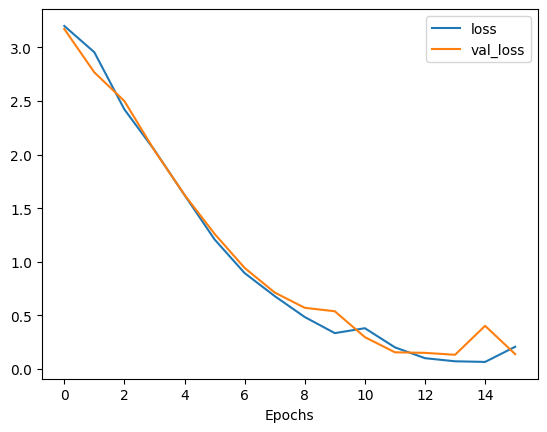

In [77]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

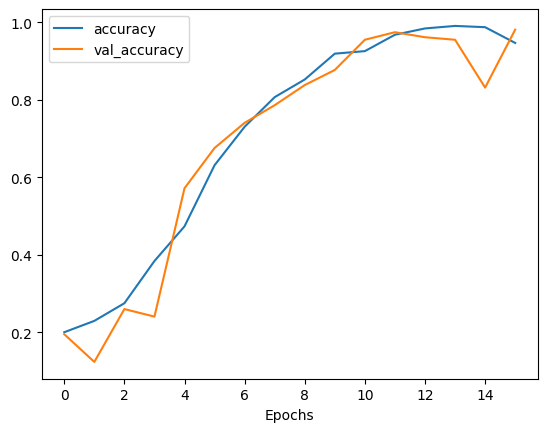

In [78]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [79]:
text = """Detail-oriented and results-driven Data Scientist with [X years] of experience in analyzing complex datasets, building predictive models, and deriving actionable insights. Proficient in statistical analysis, machine learning, and data visualization. Passionate about leveraging data to solve real-world problems.

Technical Skills
Programming Languages: Python, R, SQL, Java (or others, if applicable)
Data Analysis & Visualization: Pandas, NumPy, Matplotlib, Seaborn, Tableau, Power BI
Machine Learning: Scikit-learn, TensorFlow, PyTorch, Keras
Big Data Technologies: Hadoop, Spark
Databases: MySQL, PostgreSQL, MongoDB
Cloud Platforms: AWS, Azure, GCP (if applicable)
Tools & Others: Git, Jupyter Notebook, Docker

."""

In [80]:
resume = preprocess_text(text)

In [81]:
tokenizer.fit_on_texts(resume)


In [82]:
resume_sequence = tokenizer.texts_to_sequences([resume])  


In [83]:

x = pad_sequences(sequences,maxlen=max_length)

In [84]:
padded_sequence = pad_sequences(resume_sequence, maxlen=max_length)


In [85]:
prd = model.predict(padded_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [86]:
prd

array([[1.1481443e-02, 7.3431176e-03, 9.4003248e-04, 2.9715005e-01,
        2.8578970e-03, 6.4060179e-05, 4.5869157e-01, 1.0228966e-01,
        1.4851701e-02, 8.7851726e-02, 1.2745867e-04, 5.3256482e-04,
        4.7925190e-04, 5.0040812e-04, 1.7817003e-04, 1.0261086e-04,
        2.1930393e-03, 5.1281142e-05, 1.7982175e-03, 1.4975189e-03,
        1.6890307e-03, 4.2732251e-03, 1.3042004e-04, 2.8927987e-03,
        3.2856005e-05]], dtype=float32)

In [87]:
predicted_class = np.argmax(prd) 
confidence_score = np.max(prd)   


In [88]:


predicted_label = label.inverse_transform([predicted_class])

print(f"Predicted Category: {predicted_label[0]}")
print(f"Confidence Score: {confidence_score:.2f}")

Predicted Category: Data Science
Confidence Score: 0.46


In [89]:
import PyPDF2

In [ ]:
# Function to extract text from a single PDF file 

In [90]:
def pdf(path):
    with open(path,'rb') as file:        
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page in pdf_reader.pages:
                text += page.extract_text()
    return text

In [ ]:
# Function to extract text from multiple PDF files

In [91]:
def pdfs(pdf_files):
    resume_texts = []
    for pdf_file in pdf_files:        
        resume_text = pdf(pdf_file)
        resume_texts.append(resume_text) 
    return resume_texts

In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function to preprocess and predict categories for multiple resumes

In [93]:
def predict_category_for_resumes(resumes):   
    preprocessed_resumes = [preprocess_text(resume) for resume in resumes]
    input_sequences = tokenizer.texts_to_sequences(preprocessed_resumes)
    input_padded = pad_sequences(input_sequences, maxlen=max_length)
    predictions = model.predict(input_padded)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_categories = label.inverse_transform(predicted_classes)
    confidence_scores = np.max(predictions, axis=1) * 100 
    return predicted_categories, confidence_scores

In [94]:
def calculate_similarity(role, resumes):
    role_vector = word_vectorizer.transform([role])
    preprocessed_texts = [preprocess_text(text) for text in resumes]
    tfidf_matrix = word_vectorizer.transform(preprocessed_texts)
    similarity_scores = cosine_similarity(role_vector, tfidf_matrix).flatten()
    return similarity_scores

In [95]:
pdf_files = ["Resume/10030015.pdf", "Resume/10344379.pdf", "Resume/10818478.pdf","C:/Users/raj/Downloads/resume9.pdf","C:/Users/raj/Downloads/resume5.pdf","C:/Users/raj/Downloads/resume4.pdf","C:/Users/raj/Downloads/resume3.pdf","C:/Users/raj/Downloads/resume.pdf","C:/Users/raj/Downloads/resume2.pdf"]  


In [96]:
resumes = pdfs(pdf_files)


In [97]:
predicted_categories, confidence_scores = predict_category_for_resumes(resumes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [98]:
categories = df['Category'].unique

In [99]:
predicted_categories, confidence_scores = predict_category_for_resumes(resumes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [100]:
for i, resume in enumerate(resumes):
    print(f"Resume {i+1}:")
    print(f"Predicted Category: {predicted_categories[i]}")
    print(f"Confidence Score: {confidence_scores[i]:.2f}%\n")

Resume 1:
Predicted Category: Data Science
Confidence Score: 86.26%

Resume 2:
Predicted Category: Network Security Engineer
Confidence Score: 14.69%

Resume 3:
Predicted Category: Database
Confidence Score: 48.33%

Resume 4:
Predicted Category: HR
Confidence Score: 31.71%

Resume 5:
Predicted Category: SAP Developer
Confidence Score: 53.44%

Resume 6:
Predicted Category: HR
Confidence Score: 56.73%

Resume 7:
Predicted Category: HR
Confidence Score: 62.88%

Resume 8:
Predicted Category: HR
Confidence Score: 66.49%

Resume 9:
Predicted Category: Database
Confidence Score: 35.15%



In [104]:
# Save tokenizer for future use

In [106]:

with open('resume_tokenizer.pkl', 'wb') as tokenizer_file:
    joblib.dump(tokenizer, tokenizer_file)